In [76]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [78]:
data = pd.read_csv('train_data.txt', delimiter=':::' ,header = None ,engine='python')

In [80]:
data.columns = ['Id','Title','Genre','Desc']
data.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                Desc  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [81]:
data.drop_duplicates(inplace = True)

data.dropna(inplace = True)

In [82]:

data.shape

(54214, 4)

In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
stopwords = set(stopwords.words('english'))

In [85]:
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopwords]
    return " ".join(text)

In [86]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:

data["Desc_clean"] =  data["Desc"].apply(preprocessing)

In [89]:

data['Desc_clean']

0        listening conversation doctor parents 10yearol...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        films title refers unrecovered bodies ground z...
                               ...                        
54209    shortlived nbc live sitcom centered bonino wor...
54210    next generation exploitation sisters kapa bay ...
54211    ze bestaan echt standup comedy growing facing ...
54212    walter vivian live country difficult time keep...
54213    labor day weekend 1935 intense hurricane ever ...
Name: Desc_clean, Length: 54214, dtype: object

In [90]:
data["Genre"].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

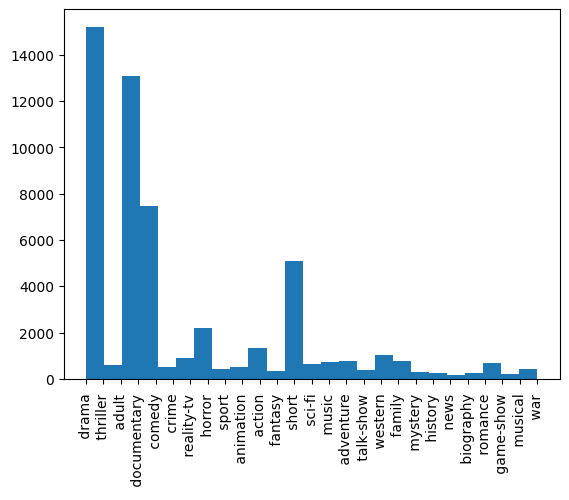

In [91]:

plt.hist(data['Genre'],bins=25)
plt.xticks(rotation=90)
plt.show()

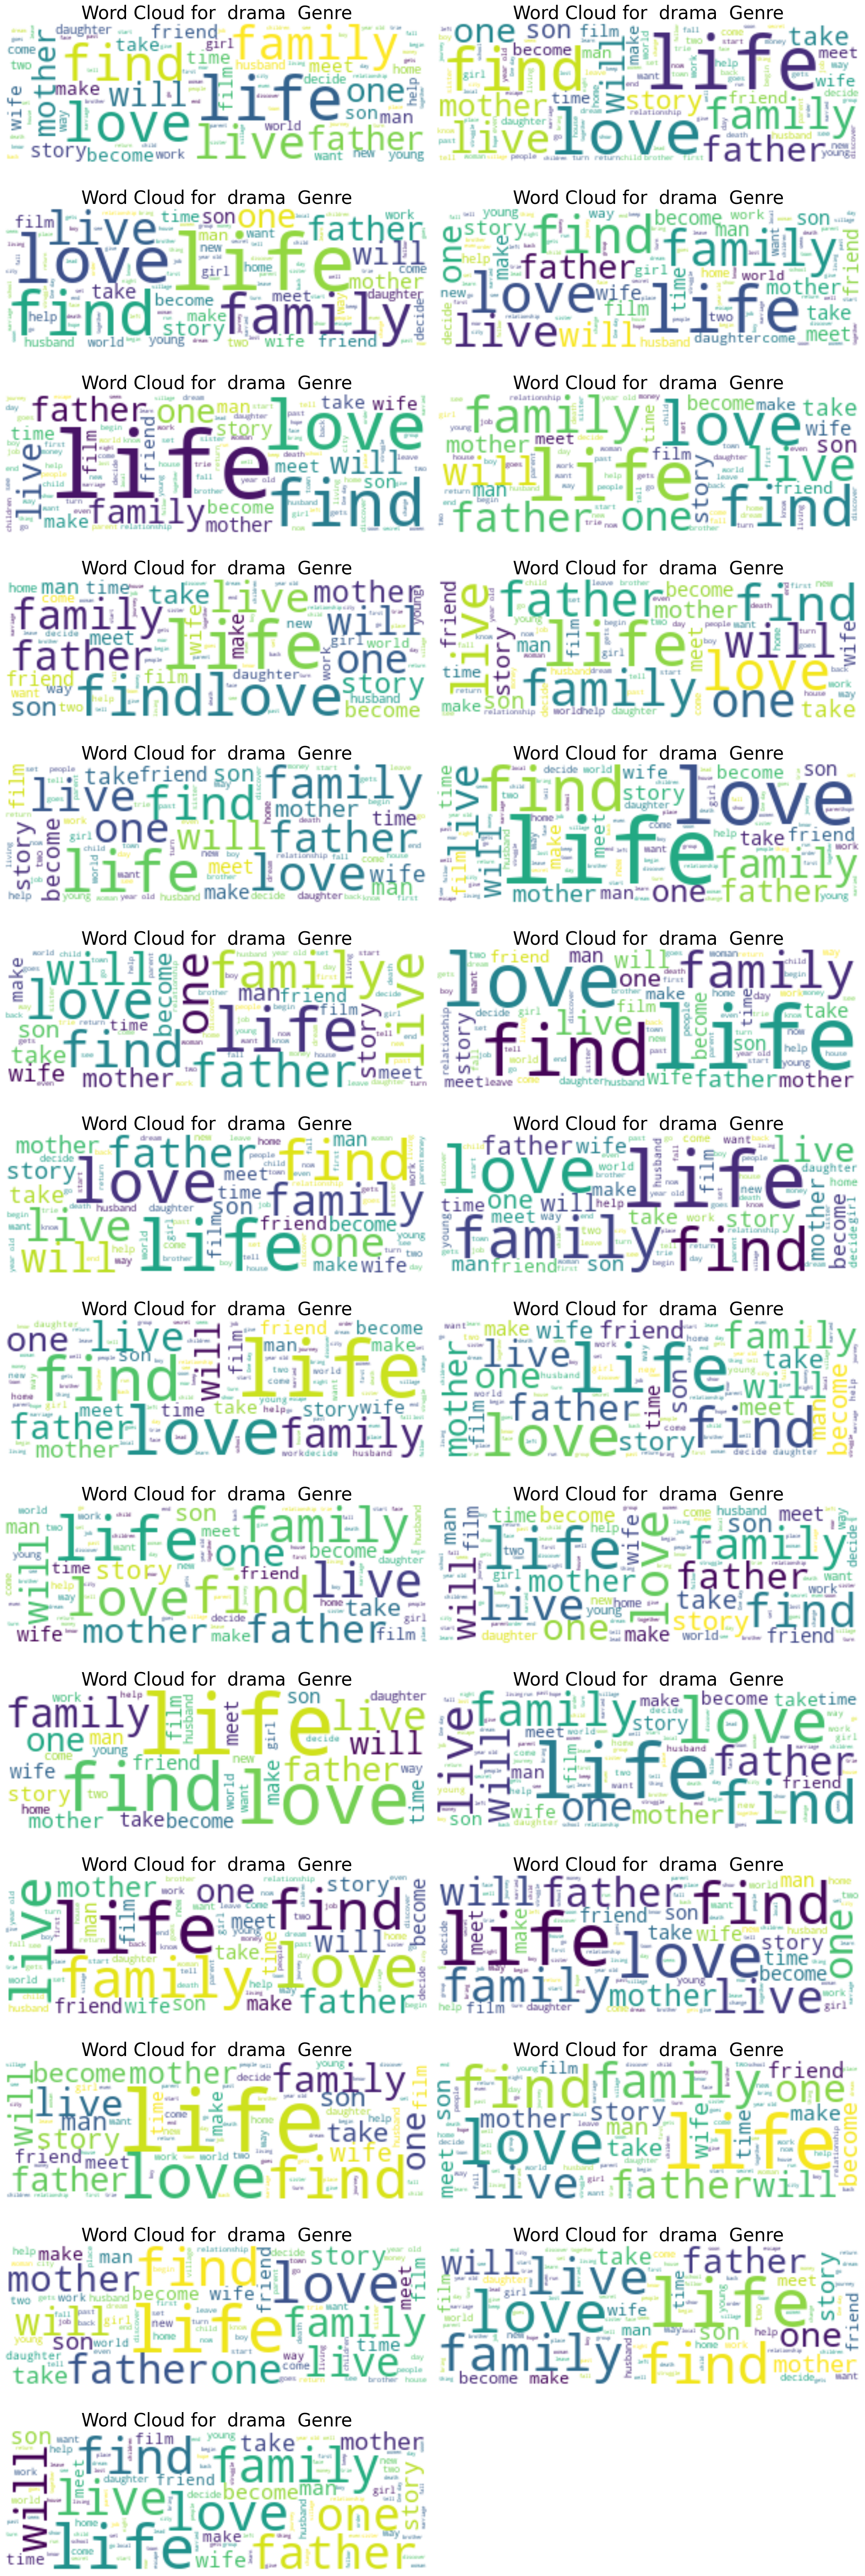

In [96]:
genres = data['Genre'].unique()
plt.figure(figsize=(20, 60))


for i, Genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  
    text_subset = " ".join(list(data[data["Genre"] == genre]['Desc']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')


plt.tight_layout()
plt.show()

In [95]:
data.drop(['Id','Title'], axis=1)
data.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                Desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          Desc_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [97]:
from sklearn.linear_model import LogisticRegression


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encd'] = label_encoder.fit_transform(data['Genre'])
class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [99]:
data.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                Desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          Desc_clean  Genre_encd  
0  listening conversation doctor parents 10yearol...           8  
1  brother sister past incestuous relationship cu...          24  
2  bus empties students field trip museum natural...           1  
3  help unemployed father make ends meet edith tw...           8  
4  films title refers unrecovered bodies ground z...           8

In [100]:
x = data["Desc_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [101]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [102]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.9994466373999336
Model Score on Test data 0.5533626000664035
               precision    recall  f1-score   support

      action        0.28      0.39      0.32       489
       adult        0.34      0.63      0.44       158
   adventure        0.18      0.40      0.25       177
   animation        0.12      0.41      0.18        76
   biography        0.00      0.00      0.00         5
      comedy        0.57      0.51      0.54      4159
       crime        0.04      0.16      0.06        64
 documentary        0.78      0.69      0.73      7409
       drama        0.69      0.54      0.61      8741
      family        0.14      0.30      0.19       174
     fantasy        0.05      0.19      0.08        42
   game-show        0.47      0.84      0.60        56
     history        0.03      0.10      0.04        30
      horror        0.60      0.65      0.62      1028
       music        0.44      0.62      0.52       257
     musical        0.10   

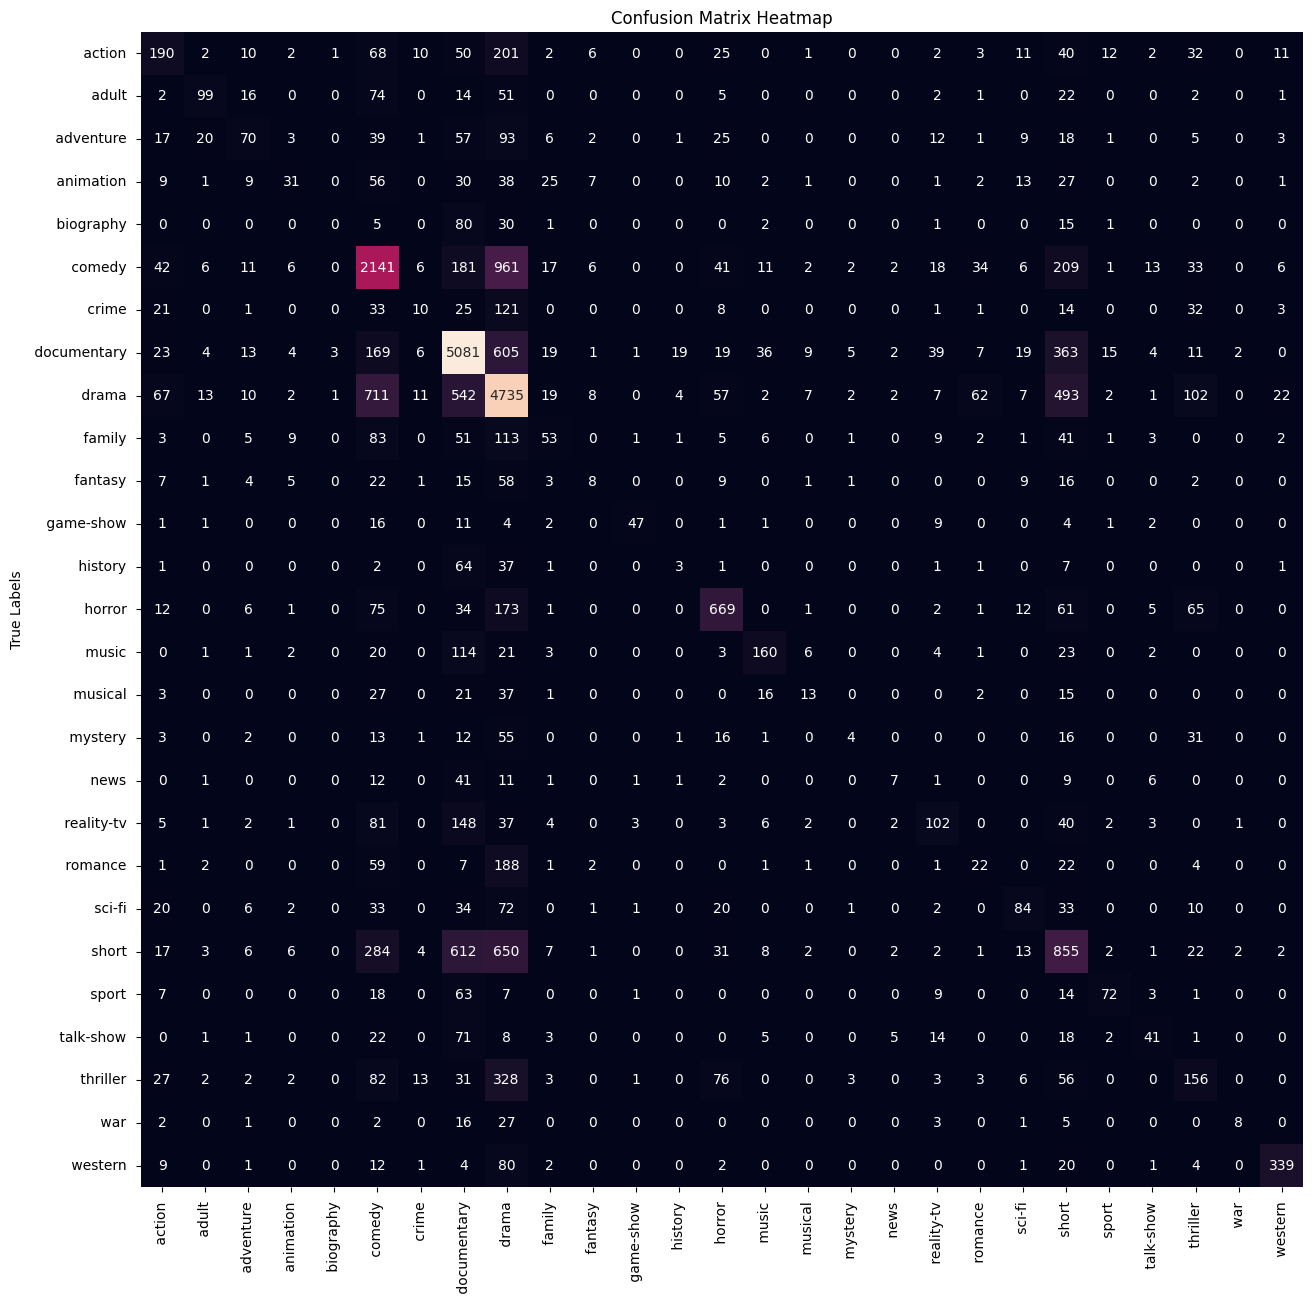

In [103]:
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Test data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15)) 
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names) 
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()